In [1]:
#Menghubungkan ke drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
#Membaca dataset
data = pd.read_csv('/content/drive/MyDrive/Skripsi/budidaya perikanan/budidaya_2021.csv')

#Data preparation
data['tahun'] = data['tahun'].astype(str)
data.rename(index=str, columns={
    'kabupaten/kota' : 'kabupaten',
    'jenis_komoditas_perikanan' : 'jenis komoditas',
    'volume_produksi' : 'volume (Ton)',
    'nilai_produksi' : 'nilai (000 Rp)'
}, inplace=True)

In [5]:
#Data shorting
data_bandeng = data[data['jenis komoditas'] == 'Bandeng']
data_lele = data[data['jenis komoditas'] == 'Lele']
data_udang = data[data['jenis komoditas'] == 'Udang Vannamei']

In [6]:
#Data preprocessing
train = data.drop(['kabupaten', 'tahun', 'jenis komoditas'], axis=1)
train_bandeng = data_bandeng.drop(['kabupaten', 'tahun', 'jenis komoditas'], axis=1)
train_lele = data_lele.drop(['kabupaten', 'tahun', 'jenis komoditas'], axis=1)
train_udang = data_udang.drop(['kabupaten', 'tahun', 'jenis komoditas'], axis=1)

In [7]:
#Feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))
train = scaler.fit_transform(train)

scaler = MinMaxScaler(feature_range=(0, 1))
train_bandeng = scaler.fit_transform(train_bandeng)

scaler = MinMaxScaler(feature_range=(0, 1))
train_lele = scaler.fit_transform(train_lele)

scaler = MinMaxScaler(feature_range=(0, 1))
train_udang = scaler.fit_transform(train_udang)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

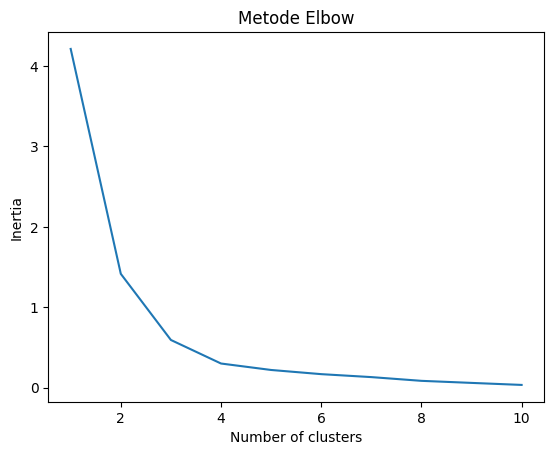

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

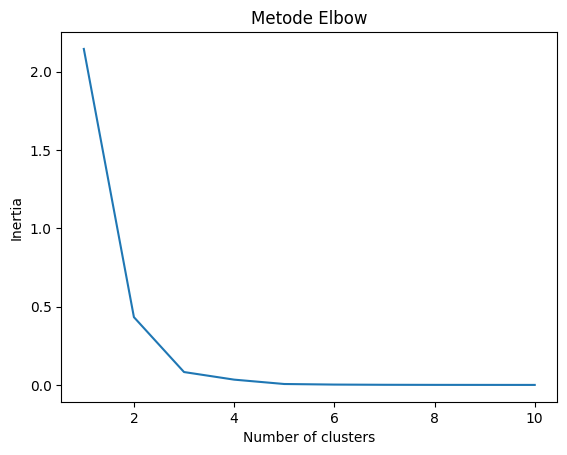

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

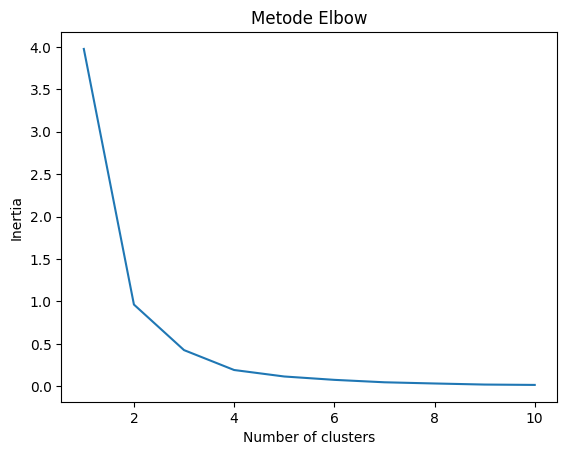

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

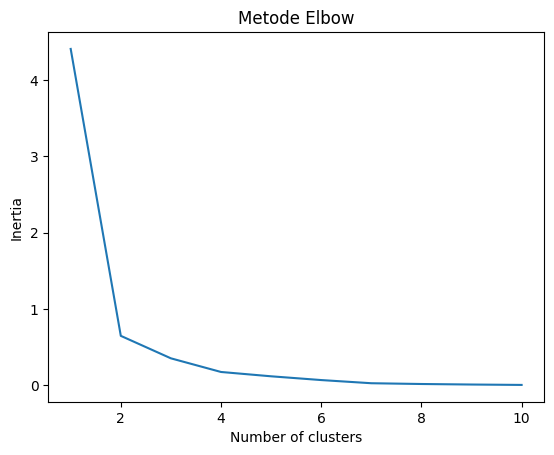

In [8]:
#Elbow metode (data budidaya perikanan)
inertia = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(train)
  inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Metode Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#Elbow method (data budidaya bandeng)
inertia = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(train_bandeng)
  inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Metode Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#Elbow method(data budidaya Lele)
inertia = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(train_lele)
  inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Metode Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#Elbow method (data budidaya udang vannamei)
inertia = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(train_udang)
  inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Metode Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [20]:
#Proses Clustering
n_cluster=3
kmeans = KMeans(n_clusters=n_cluster, init='k-means++', random_state=0)
kmeans.fit(train)

n_cluster=3
kmeans_bandeng = KMeans(n_clusters=n_cluster, init='k-means++', random_state=0)
kmeans_bandeng.fit(train_bandeng)

n_cluster=3
kmeans_lele = KMeans(n_clusters=n_cluster, init='k-means++', random_state=0)
kmeans_lele.fit(train_lele)

n_cluster=3
kmeans_udang = KMeans(n_clusters=n_cluster, init='k-means++', random_state=0)
kmeans_udang.fit(train_udang)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [21]:
#Cetak pusat cluster dan hasil cluster
print('Cluster Centers Perikanan:', kmeans.cluster_centers_)
print('Labels Cluster Perikanan:', kmeans.labels_)

print('Cluster Centers Bandeng:', kmeans_bandeng.cluster_centers_)
print('Labels Cluster Bandeng:', kmeans_bandeng.labels_)

print('Cluster Centers Lele:', kmeans_lele.cluster_centers_)
print('Labels Cluster Lele:', kmeans_lele.labels_)

print('Cluster Centers Udang:', kmeans_udang.cluster_centers_)
print('Labels Cluster Udang:', kmeans_udang.labels_)

Cluster Centers Perikanan: [[0.02591716 0.03602564]
 [0.18170052 0.4595854 ]
 [1.         1.        ]]
Labels Cluster Perikanan: [0 0 0 0 0 0 1 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0
 1 0 0 0]
Cluster Centers Bandeng: [[0.01703154 0.02318552]
 [1.         1.        ]
 [0.31461221 0.38800141]]
Labels Cluster Bandeng: [0 0 0 0 0 0 2 0 0 2 1 0 0 0 0 0 0 0]
Cluster Centers Lele: [[0.05577947 0.0550194 ]
 [0.87772459 0.84826001]
 [0.41766975 0.42061574]]
Labels Cluster Lele: [0 0 0 2 2 1 2 0 2 0 0 0 0 0 1 0 2 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]
Cluster Centers Udang: [[0.44456983 0.4248326 ]
 [0.04572229 0.04952238]
 [0.79208985 0.75848777]]
Labels Cluster Udang: [1 1 1 1 1 1 1 2 0 2 0 2 0 2 2 1 1 1 0 1 1 1]


<ipython-input-15-41af4a7df206>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(kmeans.cluster_centers_[0,0],
<ipython-input-15-41af4a7df206>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(kmeans.cluster_centers_[1,0],
<ipython-input-15-41af4a7df206>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(kmeans.cluster_centers_[2,0],


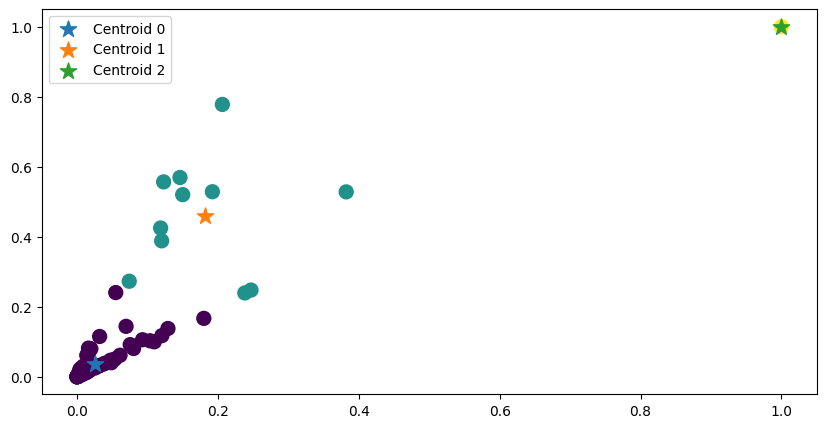

In [15]:
#Visualisasi cluster data budidaya perikanan
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(train[:,0], train[:,1],s=100, c=kmeans.labels_)
ax.scatter(kmeans.cluster_centers_[0,0],
           kmeans.cluster_centers_[0,1],
           cmap='rainbow', marker='*',s=150, label='Centroid 0')
ax.scatter(kmeans.cluster_centers_[1,0],
           kmeans.cluster_centers_[1,1],
           cmap='rainbow', marker='*',s=150, label='Centroid 1')
ax.scatter(kmeans.cluster_centers_[2,0],
           kmeans.cluster_centers_[2,1],
           cmap='rainbow', marker='*',s=150, label='Centroid 2')
ax.legend()

<ipython-input-16-42e1285f6369>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(kmeans_bandeng.cluster_centers_[0,0],
<ipython-input-16-42e1285f6369>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(kmeans_bandeng.cluster_centers_[1,0],
<ipython-input-16-42e1285f6369>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(kmeans_bandeng.cluster_centers_[2,0],


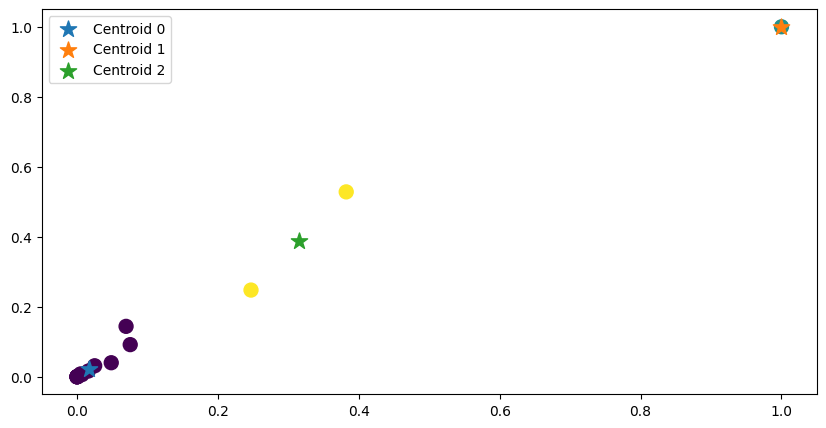

In [16]:
#Visualisasi cluster data budidaya bandeng
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(train_bandeng[:,0], train_bandeng[:,1],s=100, c=kmeans_bandeng.labels_)
ax.scatter(kmeans_bandeng.cluster_centers_[0,0],
           kmeans_bandeng.cluster_centers_[0,1],
           cmap='rainbow', marker='*',s=150, label='Centroid 0')
ax.scatter(kmeans_bandeng.cluster_centers_[1,0],
           kmeans_bandeng.cluster_centers_[1,1],
           cmap='rainbow', marker='*',s=150, label='Centroid 1')
ax.scatter(kmeans_bandeng.cluster_centers_[2,0],
           kmeans_bandeng.cluster_centers_[2,1],
           cmap='rainbow', marker='*',s=150, label='Centroid 2')
ax.legend()

<ipython-input-17-fb62ef3ed493>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(kmeans_lele.cluster_centers_[0,0],
<ipython-input-17-fb62ef3ed493>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(kmeans_lele.cluster_centers_[1,0],
<ipython-input-17-fb62ef3ed493>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(kmeans_lele.cluster_centers_[2,0],


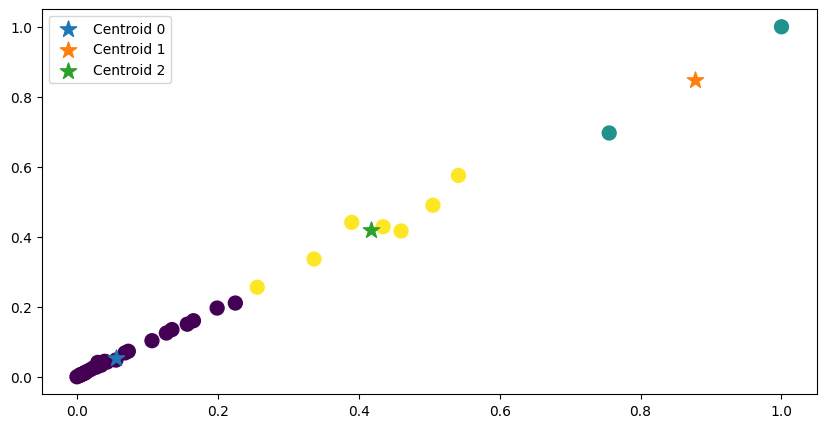

In [17]:
#Visualisasi cluster data budidaya lele
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(train_lele[:,0], train_lele[:,1],s=100, c=kmeans_lele.labels_)
ax.scatter(kmeans_lele.cluster_centers_[0,0],
           kmeans_lele.cluster_centers_[0,1],
           cmap='rainbow', marker='*',s=150, label='Centroid 0')
ax.scatter(kmeans_lele.cluster_centers_[1,0],
           kmeans_lele.cluster_centers_[1,1],
           cmap='rainbow', marker='*',s=150, label='Centroid 1')
ax.scatter(kmeans_lele.cluster_centers_[2,0],
           kmeans_lele.cluster_centers_[2,1],
           cmap='rainbow', marker='*',s=150, label='Centroid 2')
ax.legend()

<ipython-input-22-87353c4ff7dd>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(kmeans_udang.cluster_centers_[0,0],
<ipython-input-22-87353c4ff7dd>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(kmeans_udang.cluster_centers_[1,0],
<ipython-input-22-87353c4ff7dd>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(kmeans_udang.cluster_centers_[2,0],


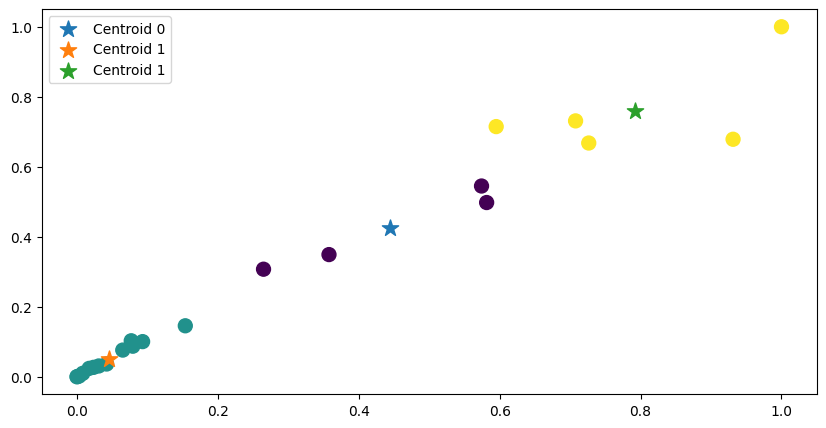

In [22]:
#Visualisasi cluster data budidaya udang vannamei
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(train_udang[:,0], train_udang[:,1],s=100, c=kmeans_udang.labels_)
ax.scatter(kmeans_udang.cluster_centers_[0,0],
           kmeans_udang.cluster_centers_[0,1],
           cmap='rainbow', marker='*',s=150, label='Centroid 0')
ax.scatter(kmeans_udang.cluster_centers_[1,0],
           kmeans_udang.cluster_centers_[1,1],
           cmap='rainbow', marker='*',s=150, label='Centroid 1')
ax.scatter(kmeans_udang.cluster_centers_[2,0],
           kmeans_udang.cluster_centers_[2,1],
           cmap='rainbow', marker='*',s=150, label='Centroid 1')
ax.legend()

In [23]:
#Silhoutte score
score = silhouette_score(train, kmeans.labels_)
score_bandeng = silhouette_score(train_bandeng, kmeans_bandeng.labels_)
score_lele = silhouette_score(train_lele, kmeans_lele.labels_)
score_udang = silhouette_score(train_udang, kmeans_udang.labels_)

print('Silhoutte Score:', score)
print('Silhoutte Score Bandeng:', score_bandeng)
print('Silhoutte Score Lele:', score_lele)
print('Silhoutte Score Udang:', score_udang)

Silhoutte Score: 0.7833442553740361
Silhoutte Score Bandeng: 0.7742558002081176
Silhoutte Score Lele: 0.7252811769354117
Silhoutte Score Udang: 0.6573926475778259


In [24]:
#Menggabungkan hasil cluster kedalam dataframe
hasil = data.copy()
hasil['cluster'] = kmeans.labels_

hasil_bandeng = data_bandeng.copy()
hasil_bandeng['cluster'] = kmeans_bandeng.labels_

hasil_lele = data_lele.copy()
hasil_lele['cluster'] = kmeans_lele.labels_

hasil_udang = data_udang.copy()
hasil_udang['cluster'] = kmeans_udang.labels_